In [12]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


# EX15 OCR
어떤 목적으로 평가할까요? 학회 발표자료 읽기로 해봅시다. 이 데이터셋은 텍스트량이 상당히 많기도 하고 폰트 크기가 심하게 왔다갔다 한다는 특징이 있습니다. 그리고 제 휴대폰에 있던 사진 중에 텍스트 많은 것들이 노트 필기 같은 거랑 책을 찎은 것 말고는 저게 전부네요.

# 검증용 데이터셋  
7개의 이미지를 찾아 pngs 디렉토리에 올렸습니다.

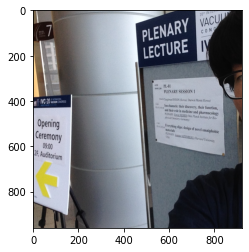

In [19]:
import matplotlib.pyplot as plt
import os

path = r'pngs/'
img_=plt.imread(os.path.join(path+'IMG_0036.png'))
plt.imshow(img_)
plt.show()
pngs=os.listdir('pngs/')

# step2.1. keras ocr 적용해보기

In [20]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [21]:
help(keras_ocr.tools.read)

Help on function read in module keras_ocr.tools:

read(filepath_or_buffer: Union[str, _io.BytesIO])
    Read a file into an image object
    
    Args:
        filepath_or_buffer: The path to the file, a URL, or any object
            with a `read` method (such as `io.BytesIO`)



In [23]:
files = [os.path.join(path,file) for file in pngs if '.png' in file] #files. exploration node의 url 대신 씁니다.

images = [ keras_ocr.tools.read(file) for file in files]
prediction_groups = [pipeline.recognize([file]) for file in files]

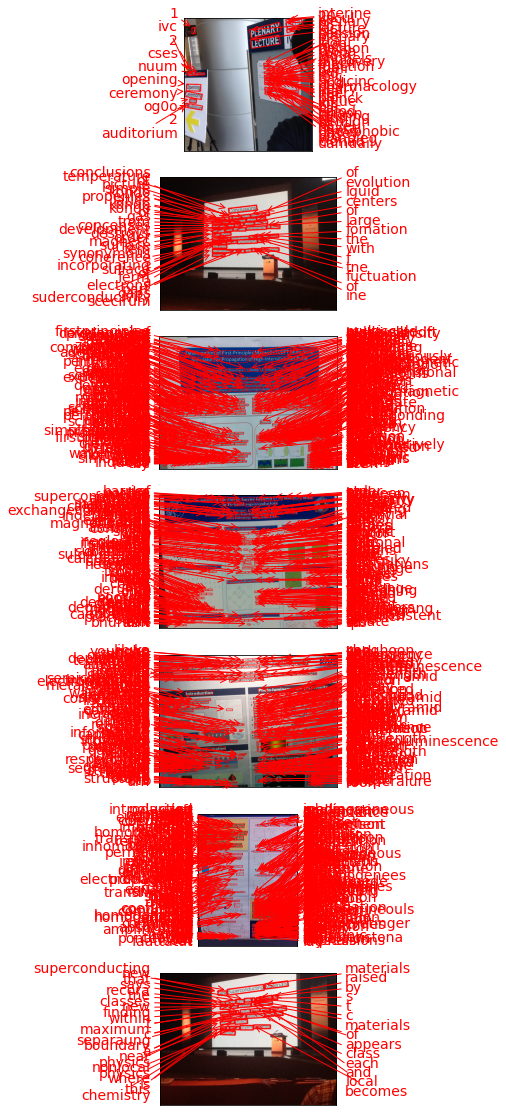

In [24]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# step 2.2) tesseract로 ocr 해보기
같은 데이터셋에 대해 tesseract로 해봅니다.

In [25]:
from PIL import Image
from pytesseract import Output

In [29]:

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

#cropped_image_path_list = crop_word_regions(files[0])
#recognize_images(cropped_image_path_list)
    
for i, file in enumerate(files):
    print('output of file'+file)
    cropped_image_path_list = crop_word_regions(file)
    recognize_images(cropped_image_path_list)

output of filepngs/IMG_0036.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004.png
./output/0005.png
./output/0006.png
./output/0007.png
./output/0008.png
./output/0009.png
./output/0010.png
./output/0011.png
./output/0012.png
./output/0013.png
./output/0014.png
./output/0015.png
./output/0016.png
./output/0017.png
./output/0018.png
./output/0019.png
./output/0020.png
./output/0021.png
./output/0022.png
./output/0023.png
./output/0024.png
./output/0025.png
./output/0026.png

P} -t}|


PLENARY

SESSION


UFLis

ow

channels:

heir

discovery,

their

lunction,

1a

te

fk

i

medicine

and

pharmac

lop

Opening

Ceremony

09:00

iF

Auditorium

e

Done
output of filepngs/plenary3_2.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004.png
(Lon

niife

1

nent

| — =

Done
output of filepngs/1.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004

# 돌아보기
둘 다 제대로 평가하려면 추가적인 지표나 단계가 필요하겠다. 이걸로는 도저히 평가하기가 어렵다.
keras-ocr이나 tesseract나 너무 글자가 많이 인식되고 있는데 이걸 문단별로 자르던가 아니면 평가지표를 잘 만들어서 평가된 값을 바로 내놓도록 해야겠다. tesseract가 이해할 수 없는 단어를 엄청나게 내뱉었고, plenary3_3.png 같은 것은 거의 읽지 못했다. 그것에 대해서는 확실히 keras-ocr이 나았는데 나머지는 그런 식의 비교도 불가능하다.